### Wavelet Transform

In [17]:
import numpy as np
import cv2
import pywt
import matplotlib.pyplot as plt

def w2d(img, mode='haar', level=1):
    imArray = img
    # convert to grayscale
    imArray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # convert to float
    imArray = np.float64(imArray)
    # normalize: to convert values from 0 to 1
    imArray /= 255
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level)
    #process coeffs: approximations and details
    coeffs_H=list(coeffs)  
    # set approximate coeffs to zero - removes coarse noise, emphasizes edges
    coeffs_H[0] *= 0;
    # reconstruction: using cleaned signal
    imArray_H = pywt.waverec2(coeffs_H, mode)
    # denormalize: to get back rgb values
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

This function processes an image using wavelet transformation, specifically with the Haar wavelet. Here's a breakdown of its steps:

<img src="https://files.oaiusercontent.com/file-ANjy3Q4edeWegacFpZqUvA?se=2024-12-12T20%3A10%3A00Z&sp=r&sv=2024-08-04&sr=b&rscc=max-age%3D604800%2C%20immutable%2C%20private&rscd=attachment%3B%20filename%3D6ccdcb6e-393e-44a7-8b56-71ba36a7cd71.webp&sig=PN4jn1EMx4t5k%2B7fY0/9CazDp/glbo5YJGXn76H1ZcI%3D" alt="image_pipeline" width="400px">

### Function Explanation
1. **Convert to Grayscale:**
   - The function takes an image (`img`) and converts it to grayscale using `cv2.cvtColor`. Grayscale reduces computational complexity by working with single-channel intensity values instead of multi-channel RGB data.

2. **Normalize the Image:**
   - The pixel values are converted to floats and normalized to the range [0, 1] by dividing by 255. This is often necessary for wavelet transformations.

3. **Wavelet Decomposition:**
   - The function computes wavelet decomposition using the `pywt.wavedec2` method, which breaks the image into multiple frequency bands (approximation and detail coefficients).

4. **Modify Coefficients:**
   - The approximation coefficients (`coeffs_H[0]`) are set to zero. This operation removes the low-frequency content (coarse details) of the image, emphasizing edges and finer details.

5. **Wavelet Reconstruction:**
   - The modified coefficients are used to reconstruct the image using `pywt.waverec`. The reconstructed image emphasizes the high-frequency details, often used for edge detection or texture analysis.

6. **Denormalize and Convert to Unsigned Integer:**
   - The reconstructed image is scaled back to the range [0, 255] and converted to `np.uint8` for compatibility with image processing libraries.

### Purpose:
This function is typically used for:
- Feature extraction in image processing.
- Highlighting edges and textures.
- Preprocessing images for machine learning models.

### Load & Cropping Image, and testing W2D

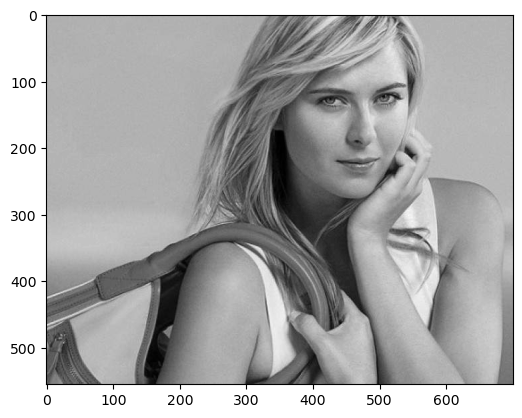

In [21]:
img = cv2.imread('./test_images/sharapova1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show();

In [23]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

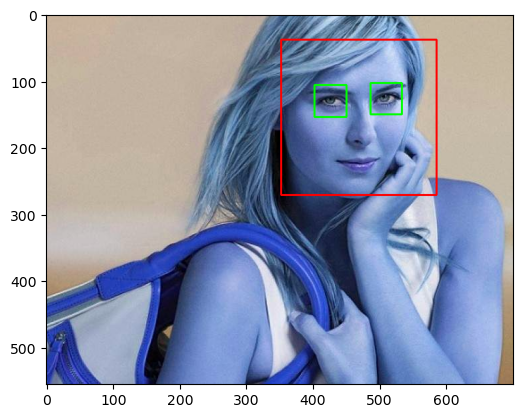

In [25]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

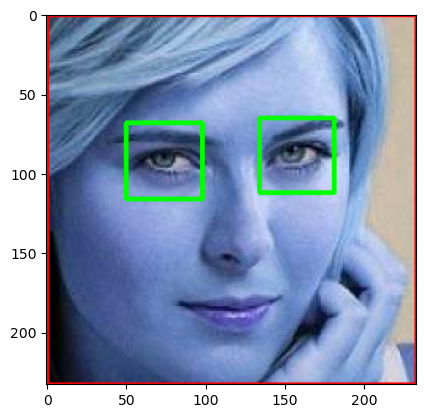

In [27]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show();

In [29]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

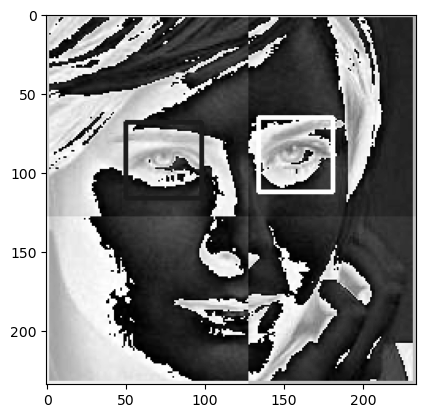

In [31]:
img_har = w2d(cropped_img, 'db1', 5)
plt.imshow(img_har, cmap='gray')
plt.show();

### Preparing Data

In [34]:
# load the training file names

import json

# Load JSON data from a file
with open("celeb_file_names.json", "r") as json_file:
    celeb_file_names_dict = json.load(json_file)

# Print the loaded dictionary
json_data = json.dumps(celeb_file_names_dict, indent=4)  # `indent=4` makes it pretty-printed
print(json_data)

{
    "lionel_messi": [
        "./train_images/cropped/lionel_messi/lionel_messi1.png",
        "./train_images/cropped/lionel_messi/lionel_messi2.png",
        "./train_images/cropped/lionel_messi/lionel_messi3.png",
        "./train_images/cropped/lionel_messi/lionel_messi4.png",
        "./train_images/cropped/lionel_messi/lionel_messi5.png",
        "./train_images/cropped/lionel_messi/lionel_messi6.png",
        "./train_images/cropped/lionel_messi/lionel_messi7.png",
        "./train_images/cropped/lionel_messi/lionel_messi8.png",
        "./train_images/cropped/lionel_messi/lionel_messi9.png",
        "./train_images/cropped/lionel_messi/lionel_messi10.png",
        "./train_images/cropped/lionel_messi/lionel_messi11.png",
        "./train_images/cropped/lionel_messi/lionel_messi12.png",
        "./train_images/cropped/lionel_messi/lionel_messi13.png",
        "./train_images/cropped/lionel_messi/lionel_messi14.png",
        "./train_images/cropped/lionel_messi/lionel_messi15.p

In [36]:
X = []
y = []

celeb_index = {}
# generate a number for each celeb
count=0
for celeb in celeb_file_names_dict.keys():
    celeb_index[celeb] = count
    count+= 1

for celeb, files in celeb_file_names_dict.items():
    for file in files:
        img = cv2.imread(file)

        # since we manually deleted some files let's check if img exists
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        # vertically stack the images: model can use features from both images to classify
        # raw image has 3d rgb , so 32*32*3
        combined_img = np.vstack(( scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1) ))
        X.append(combined_img)
        y.append(celeb_index[celeb])

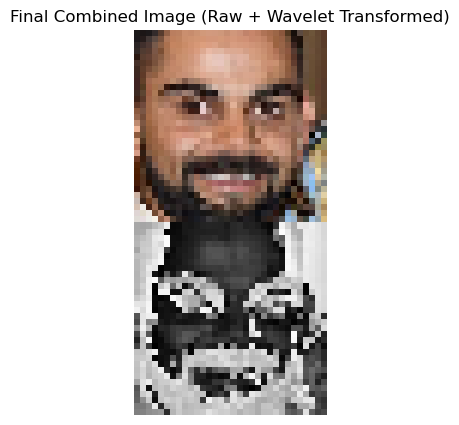

In [37]:
import matplotlib.pyplot as plt

# Assuming combined_img is flattened array
raw_img_flattened = combined_img[:32*32*3]  # Raw image flattened part
har_img_flattened = combined_img[32*32*3:]  # Wavelet image flattened part

# Reshape the raw and wavelet parts back to their original shapes
scaled_raw_img = raw_img_flattened.reshape(32, 32, 3)
scaled_img_har = har_img_flattened.reshape(32, 32)

# Convert the wavelet image (grayscale) to 3 channels for display
scaled_img_har_rgb = cv2.cvtColor(scaled_img_har, cv2.COLOR_GRAY2BGR)

# Stack the two images vertically (to match the combined image)
combined_canvas = np.vstack((scaled_raw_img, scaled_img_har_rgb))

# Visualize the final combined image
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(combined_canvas, cv2.COLOR_BGR2RGB))
plt.title("Final Combined Image (Raw + Wavelet Transformed)")
plt.axis("off")
plt.show()

In [38]:
# convert the combined image to an np array of floats and a 1d array for each img, to feed the model
# take the whole X and make a 2d array, of len 4096 for each img

X = np.array(X).reshape(len(X), 32*32*3 + 32*32).astype(float)
X.shape

(171, 4096)

We have 171 images

In [43]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [45]:
y = np.array(y)

In [47]:
y.shape

(171,)

171 outputs

### Model Training

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipe = Pipeline([('Scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('svc', SVC(C=10))])

In [72]:
pipe.score(X_test, y_test)

0.8857142857142857

In [74]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.88      1.00      0.93         7
           2       1.00      0.80      0.89         5
           3       0.80      0.80      0.80         5
           4       0.90      0.90      0.90        10

    accuracy                           0.89        35
   macro avg       0.89      0.88      0.88        35
weighted avg       0.89      0.89      0.89        35



In [78]:
# using GridSearchCV we got to know, svm with linear kernel and C=1 is best

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear', C=1))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [80]:
pipe.score(X_test, y_test)

0.9428571428571428

In [86]:
!pip install joblib
import joblib

joblib.dump(pipe, 'model.pkl')

['model.pkl']